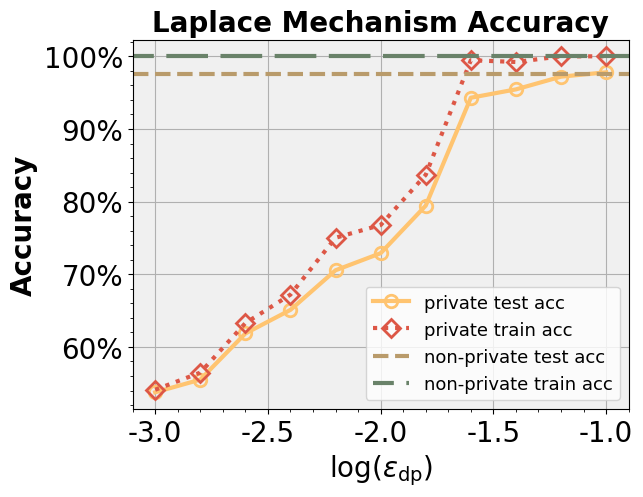

In [4]:
import matplotlib.pyplot as plt
import os
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker

save_fig_dir = "ntk_figs"
os.makedirs(save_fig_dir, exist_ok=True)


font_size = 20
line_width=3.0
# marker_size=11
# color_list = ["#ffc470", "#f6a865", "#ee8d5b", "#e57250", "#dd5746"]
color_list = ["#ffc470", "#dd5746", "#ee8d5b", "#e57250", ]
marker_list = ["o", "D", "^", "p", "X"]
line_style_dict = {
    "solid" : "solid",
    "dotted" : "dotted",
    "dashed" : "dashed",
    "dashdot" : "dashdot",
    'long dash with offset': (5, (10, 3)), 
    'dashdotted' : (0, (3, 5, 1, 5)),
}
line_style_list = ["solid", "dotted", "dashed", 'dashdotted', 'long dash with offset']


x_data = [-3.0, -2.8, -2.6, -2.4, -2.2, -2.0, -1.7999999999999998, -1.5999999999999999, -1.4, -1.2, -1.0]
test_acc_list = [0.5375000238418579, 0.5550000071525574, 0.6184999942779541, 0.6510000228881836, 0.7055000066757202, 0.7290000319480896, 0.7945000529289246, 0.9430000185966492, 0.9545000195503235, 0.9719999432563782, 0.9780]
train_acc_list = [0.5410500168800354, 0.5646499991416931, 0.6327500343322754, 0.6720000505447388, 0.7502500414848328, 0.7677499651908875, 0.8368999361991882, 0.9946500658988953, 0.9922000169754028, 1.0, 1.0]

y_data_list = [test_acc_list, train_acc_list]
y_data_name_list = ["private test acc", "private train acc"]

non_private_test_acc, non_private_train_acc = 0.975, 1.0

title_name = "Laplace Mechanism Accuracy"

# create a new figure
# plt.figure(figsize=(8, 6))
plt.figure()
# plt.figure(figsize=(16, 12))
# get current axis
ax = plt.gca()
# turn background into lightgrey
ax.set_facecolor('#f0f0f0')
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

for i, y_data in enumerate(y_data_list):
    plt.plot(x_data, y_data, label=y_data_name_list[i], marker=marker_list[i], color=color_list[i], linewidth=line_width, markersize=9, markerfacecolor="None",
        markeredgecolor=color_list[i], markeredgewidth=2, linestyle=line_style_dict[line_style_list[i]])

plt.grid(True)  # show grid
# add legend
# plt.legend(fontsize=font_size, loc='upper right')


# add title and labels for x and y
plt.title(title_name, fontsize=font_size, fontweight='bold')
plt.xlabel(r'$\log (\epsilon_{\mathrm{dp}})$', fontsize=font_size, fontweight='bold')
plt.ylabel('Accuracy', fontsize=font_size, fontweight='bold')

plt.minorticks_on()

# set stick font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.axhline(y=non_private_test_acc, color='#B99B6B', linewidth=line_width, linestyle=line_style_dict[line_style_list[2]], label="non-private test acc")
plt.axhline(y=non_private_train_acc, color='#698269', linewidth=line_width, linestyle=line_style_dict[line_style_list[4]], label="non-private train acc")

plt.legend(fontsize=13)

# # # # show fig
# plt.show()

# # if args.save_type == "pdf":
save_fig_path = os.path.join(save_fig_dir, f"lapalce_mechanism_accuracy.pdf")
# print(save_fig_path)
plt.savefig(save_fig_path, format='pdf', bbox_inches='tight', pad_inches=0.05)
# # elif args.save_type == "png":
# save_fig_path = os.path.join(save_fig_dir, f"{save_file_name}.png")
# # print(save_fig_path)
# plt.savefig(save_fig_path, format='png', bbox_inches='tight', pad_inches=0.05)

# print(f"fig save to {save_fig_path}")

# # clean up plt
# plt.clf()
